# Actividad Guiada 1 de Algoritmos de Optimización


Nombre: Carlos Javier Bravo Intriago

https://colab.research.google.com/drive/1O-szoWNwIfQvto4LrLKE7O1djeIBm0kq?usp=sharing

https://github.com/carlosbravo1408/03MIAR-Algoritmos-de-Optimizacion-2025/tree/main/AG1

<!--
1.   Elemento de lista
2.   Elemento de lista
-->


# Torres de Hanoi - Divide y vencerás

<div style="display: flex; flex-direction: row; align-items: flex-start; gap: 20px; padding: 20px;">
    <div style="flex: 0 0 600px; text-align: center;">
        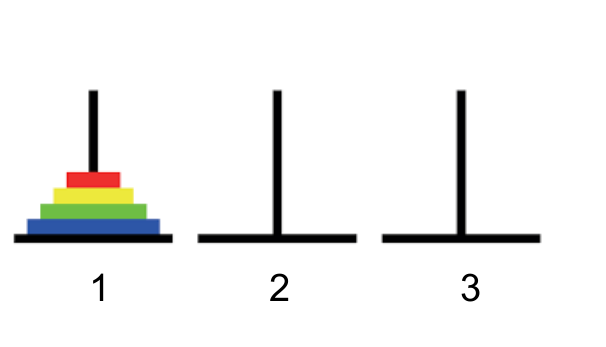
        <p style="text-align: center; font-size: 0.85em; margin-top: 5px; line-height: 1.2;">Fig 1. Torres de Hanoi. <i>Adaptado de <a href="img1">[1]</a></i></p>
    </div>
    <div style="flex: 0 0 700px; text-align: center;">
        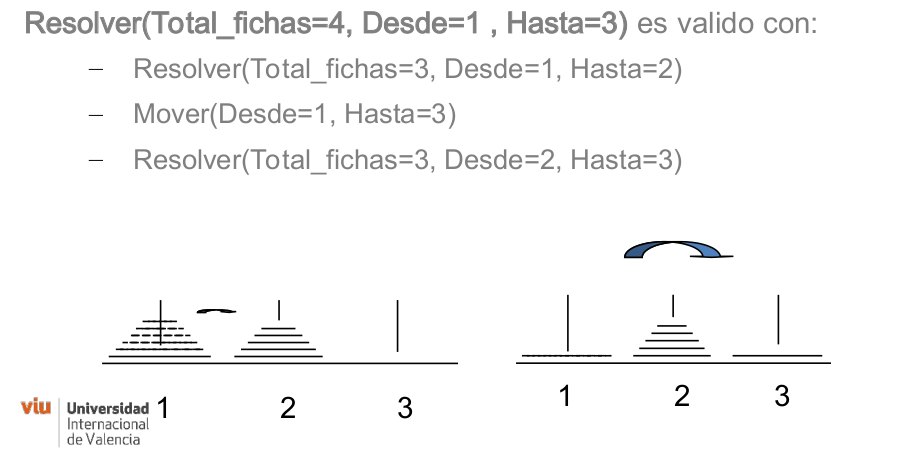
        <p style="text-align: center; font-size: 0.85em; margin-top: 5px; line-height: 1.2;">Fig 2. Esquema de resolucion bajo la estrategia de Divide y vencerás</p>
    </div>
</div>


In [ ]:
#Torres de Hanoi - Divide y vencerás
################################################################################


################################################################
def Torres_Hanoi(N, desde, hasta):
  #N - Nº de fichas
  #desde - torre inicial
  #hasta - torre fina
  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

  else:
    Torres_Hanoi(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    Torres_Hanoi(N-1, 6-desde-hasta,  hasta)

Torres_Hanoi(5, 1, 3)
################################################################


# Cambio de monedas - Técnica voraz

In [ ]:
#Cambio de monedas - Técnica voraz
################################################################################
SISTEMA = [50,20,10,5,1]  # Comentario Carlos Javier: Si el orden es ascendente, ya deja de ser Voraz
################################################################
def cambio_monedas(CANTIDAD,SISTEMA):
#....
  SISTEMA.sort(reverse=True)
  SOLUCION = [0]*len(SISTEMA)
  ValorAcumulado = 0

  for i,valor in enumerate(SISTEMA):
    monedas = (CANTIDAD-ValorAcumulado)//valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor

    if CANTIDAD == ValorAcumulado:
      return SOLUCION

  print("No es posible encontrar solucion")
cambio_monedas(100,SISTEMA)


################################################################

# N Reinas - Vuelta Atrás(Backtracking)

<div style="flex: 0 0 200px; text-align: center;">
        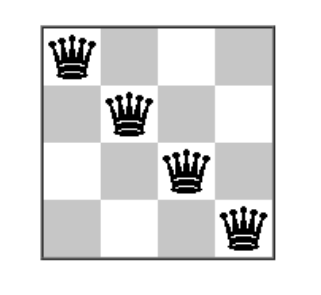
        <p style="text-align: center; font-size: 0.85em; margin-top: 5px; line-height: 1.2;">Fig 3. Problema de las N Reinas.</p>
    </div>
</div>

In [ ]:
import tracemalloc
import time
from functools import wraps
from typing import List, Union, Tuple


# decoradores
def measure_time(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Tiempo de ejecucion: {elapsed_time} seg")
        return result
    return wrapper

def measure_memory(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        tracemalloc.start()
        result = func(*args, **kwargs)
        _, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        # 1 << 10 = 1024, 1 << (10*2) = 1024**2  Conversion a MB
        print(f"Memoria usada aproximada: {peak/(1<<(10*2))} MB")
        return result
    return wrapper


In [ ]:
#N Reinas - Vuelta Atrás()
################################################################################

#Verifica que en la solución parcial no hay amenazas entre reinas
################################################################
def es_prometedora(SOLUCION,etapa):
################################################################
  #print(SOLUCION)
  #Si la solución tiene dos valores iguales no es válida => Dos reinas en la misma fila
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False

    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

#Traduce la solución al tablero
################################################################
def escribe_solucion(S):
################################################################
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")



#Proceso principal de N-Reinas
################################################################
def reinas(N, solucion=[],etapa=0):
################################################################
### ....
  if len(solucion) == 0:         # [0,0,0...]
    solucion = [0 for i in range(N) ]

  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
      else:
        reinas(N, solucion, etapa+1)
    else:
      None

  solucion[etapa] = 0

@measure_time
@measure_memory
def resolver_reinas(n):
  return reinas(n,solucion=[],etapa=0)

resolver_reinas(8)

In [ ]:
escribe_solucion([1, 5, 8, 6, 3, 7, 2, 4])

## Propuesta Del estudiante:

### Variante 1

Se tomó como inspiración el código disponible en Wikipedia, con la variante de que valida las configuraciones antes de encolarlas a la lista de permutaciones posibles. (Evitando asi una validación lineal extra)

In [ ]:
@measure_time
@measure_memory
def solve_n_queens(n: int) -> List[List[int]]:
    if n == 1: return [[0]] # una unica reina
    if n in [2, 3]: return [] # no existe solucion con 2 o 3 reinas
    solution: List[List[int]] = [[]]
    for i in range(n):
        solution = extend_with_valid_solutions(solution, n)
    return solution

# Aquí el método validate_solution es de complejidad cuadrática, hay dos bucles for anidados
def validate_solution(solution: Union[List[int], Tuple[int]]) -> bool:
    for i in range(len(solution)):
        q1 = solution[i]
        for j in range(i+1, len(solution)):
            q2 = solution[j]
            if abs(q1 - q2) == abs(i-j):
                return False
            if q1 == q2:
                return False
    return True

def extend_with_valid_solutions(previous_permutation: list, n: int):
    new_permutation = []
    for p in previous_permutation:
        for i in range(n):
            extended_array = p + [i]
            if validate_solution(extended_array):
                new_permutation.append(extended_array)
    return new_permutation

print(solve_n_queens(8))


<div style="flex: 0 0 300px; text-align: center;">
        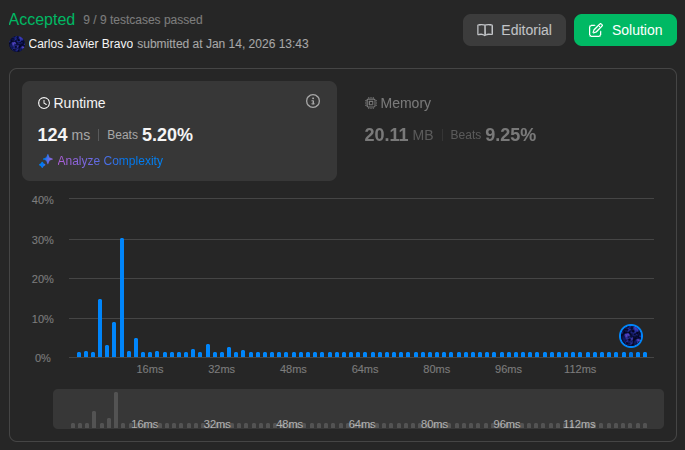
        <p style="text-align: center; font-size: 0.85em; margin-top: 5px; line-height: 1.2;">Fig 4. Captura resultado en ranking para el problema de las N Reinas en https://leetcode.com/</p>
    </div>
</div>

<!--
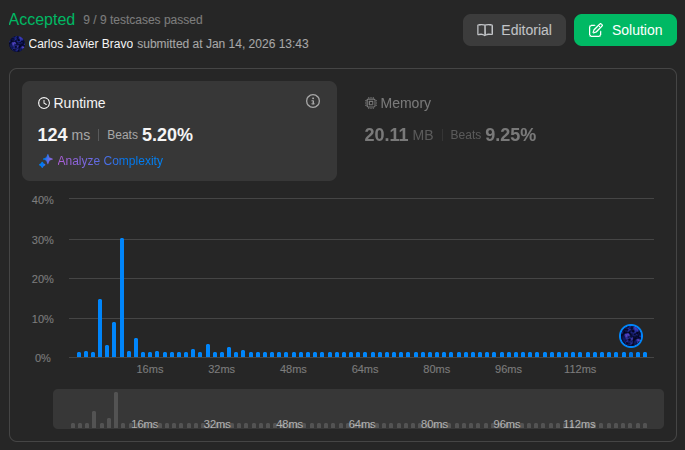
-->

### Variante 2

Se aplica una pequena optimización a la variante anterior, bajando la complejidad temporal un poco

In [ ]:
# Aquí el método validate_solution ahora es de complejidad lineal, se ha quitado la búsqueda redundante por casos ya conocidos
def validate_solution(solution: Union[List[int], Tuple[int]], current_queen_column: int) -> bool:
    current_row = len(solution)
    for row, col in enumerate(solution):
        if col == current_queen_column:
            return False
        if abs(current_row - row) == abs(current_queen_column - col):
            return False
    return True

def extend_with_valid_solutions(perm: list, n: int):
    new_perm = []
    for p in perm:
        for i in range(n):
            if validate_solution(p, i):
                extended_array = p + [i]
                new_perm.append(extended_array)
    return new_perm

print(solve_n_queens(8))

<div style="flex: 0 0 300px; text-align: center;">
        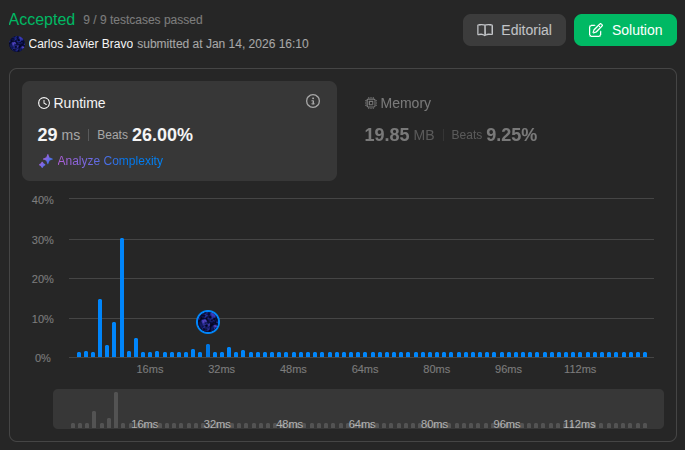
        <p style="text-align: center; font-size: 0.85em; margin-top: 5px; line-height: 1.2;">Fig 5. Captura resultado en ranking para el problema de las N Reinas despues de aplicar la optimizacion en https://leetcode.com/</p>
    </div>
</div>

<!--
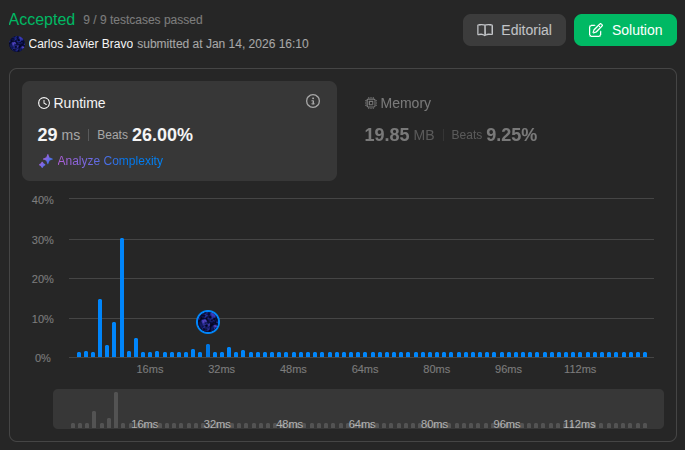
-->
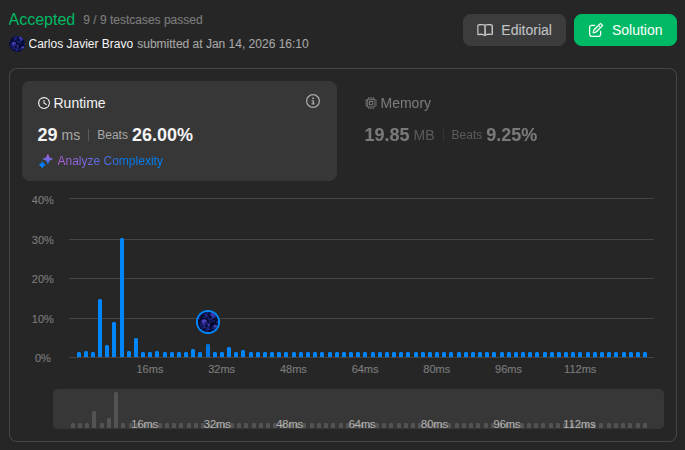

# Encontrar los dos puntos más cercanos

Dado un conjunto de puntos se trata de encontrar los dos puntos más cercanos entre sí.


# Referencias Bibliográficas

[1<a id="img1"></a>] "Anónimo", "Hanoi Towers" Imgur, Octubre 2017. [Imagen en línea]. Disponible en: [https://imgur.com/qslq5kH](https://imgur.com/qslq5kH).